![license_header_logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

## Introduction 
In this notebook we will be using the famous titanic datasets and perform machine learning ( supervised learning ) to predict either the person survive or not
![image](https://miro.medium.com/max/2000/1*qTqs-DD_i5dqUtTuaVzfWw.png)
## What will we accomplish?
By the end of the notebook:
1. Trainee will understand the overall process of creating machine learning model
2. Trainee will learn how to make model for titanic dataset

## Notebook Content
* [Part 1 : Data Exploration](#getdata)
* [Part 2 : Data Preparation ](#preparedata)
* [Part 3 : Model training ](#model)


## Workflow stages
1. Question or problem definition.
2. Acquire data.
3. Exploratory Data Analysis(EDA) (*The order can be difference between cases*)
    1. Wrangle, prepare, cleanse the data.
    2. Analyze, identify patterns, visualizing and explore the data.
    3. Dimension Reduction, Feature Engineering，Statistical Inference
6. Modeling, predict and solve the problem.
7. Visualize, report, and present the problem solving steps and final solution.
8. Supply or submit the results. 

## Question or problem definition
Before we start any project, it is important we know about the project summary, definite the problem that we need to solve , understand the data dictionary and variable notes of the dtaaset.

**Project Summary**: 
* The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. 
* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 
* This sensational tragedy shocked the international community and led to better safety regulations for ships.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**Problem definition**:
* Complete the analysis of what sorts of people were likely to survive. 
* Apply the tools of machine learning to predict which passengers survived the tragedy.

**Data Dictionary**<br>
![image](https://user-images.githubusercontent.com/59526258/133946732-6a5b5841-cc2e-4bc3-8d5b-0bc0c9d8567d.png)
**Variable Notes** <br>

**pclass**: A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>

**sibsp**: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>

**parch**: The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model evaluation
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

###  <a name="getdata">Acquire data

In [2]:
x_train = pd.read_csv('../data/titanic_train.csv')
x_test  = pd.read_csv('../data/titanic_test.csv')

In [3]:
x_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
x_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Asking questions about your data.**<br>

> - ***Which features are categorical?***<br>
The characteristic of categorical values is to classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.<br>
    ***Categorical: `Survived`, `Sex`, and `Embarked`.***<br>
    ***Ordinal: `Pclass`***<br>

> - ***Which features are numerical?***<br>
Which features are numerical? The characteristic of numerical is change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.<br>
    ***Continous: `Age`,` Fare`.*** <br>
    ***Discrete: `SibSp`, `Parch`.***<br>
    
> - ***Which features are mixed data types?***<br>
    ***`Ticket`*** and ***`Cabin`*** is a mix of numeric and alphanumeric data types

## Exploratory Data Analysis (EDA)
### Analyze, identify patterns, visualizing and explore the data.
#### Explore the data

From overall analysis we know that some of the columns will not effect the survival of a person which later we will remove if needed

In [5]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Asking questions about your data.**<br>
> - ***What are the data types for various features?***<br>
    ***Seven features are integer or floats***<br>
    ***Five features are strings (object)***
    

> - ***Which features contain blank, null or empty values?***<br>
Here we will look at the data type, and its non null count. The summary shown that the maximun number of row of data is 891. However, there are some of the column data which have less row of data compare to 891.<br> 
    ***`Age`, `Cabin`, `Embarked`***

Since we know there is null in the dataset, we will look at the percentage of the null value for each column 

In [7]:
total = x_train.isnull().sum().sort_values(ascending=False)
percent = x_train.isnull().sum()/x_train.isnull().count()*100
percent_rounded = (round(percent, 1)).sort_values(ascending=False)
missing= pd.concat([total, percent_rounded], axis=1, keys=['Total', '%'])
missing.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


From this analysis we know that cabin account for have a lot of missing data (71%) which needed to be addreses and age which is 19.9% and lastly embarked 0.2% and these low number missing data will be easier to handle later durig cleaning. 

#### Data Validation and Data Exploration

In [8]:
x_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

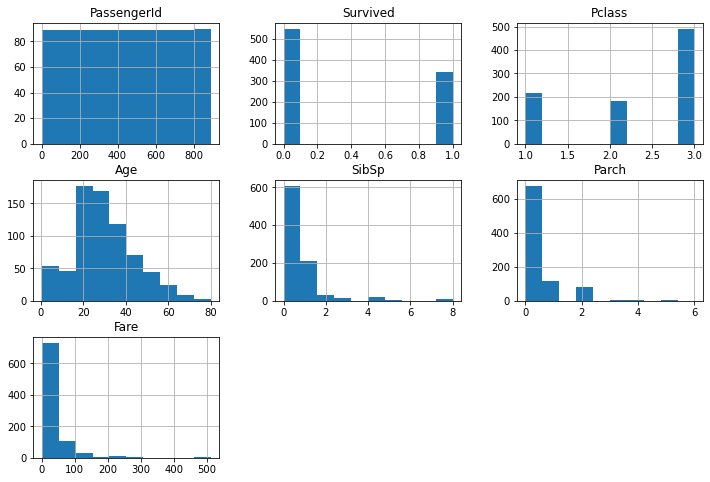

In [9]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,8))
x_train.hist(ax = fig.gca())

**Asking questions about your data.**<br>
> - ***What is the distribution of numerical feature values across the samples?***<br>
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain. Based on the research and info, we can determine that:<br>
    - ***Data Validation***
        - Total samples are 891 or 40% of the [actual number of passengers on board the Titanic (2,224)](https://www.history.com/topics/early-20th-century-us/titanic).
        - Around 38% samples survived (by refer to mean) [representative of the actual survival rate at 32%](https://www.dummies.com/education/history/titanic-passenger-survival-rates/).<br>
    - ***Data Exploration***
        - Survived is a categorical feature with 0 or 1 values.
        - Most passengers (> 75%) did not travel with parents or children.
        - Most of passengers had siblings and/or spouse aboard.
        - Fares varied significantly with few passengers paying as high as $512.
        - Few elderly passengers within age range 60-80.

In [10]:
x_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Asking questions about your data.**<br>
> - ***What is the distribution of categorical features?***<br>
    - Names are unique across the dataset (count=unique=891)
    - Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
    - Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
    - Embarked takes three possible values. S port used by most passengers (top=S)
    - Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Check Assumptions
We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.
> - ***Correlating***<br>
    1. We need to know how well does each feature correlate with `Survival`.So that we can match these quick correlations with modelled correlations later in the project.
> - ***Completing***<br>
    1. We may want to complete `Age` feature as it is definitely correlated to survival.
    2. We may want to complete the `Embarked` feature as it may also correlate with survival or another important feature.
> - ***Correcting***<br>
    1. `Ticket` feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
    2. `Cabin` feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
    3. `PassengerId` may be dropped from training dataset as it does not contribute to survival.
    4. `Name` feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.   
> - ***Creating (Feature Enginnering)***<br>
    1. We may want to create a new feature called `Family` based on `Parch` and `SibSp` to get total count of family members on board.
    2. We may want to feature engineer the `Name` feature to extract `Title` as a new feature.
    3. We may want to create new feature for `Age` bands. This turns a continous numerical feature into an ordinal categorical feature.
    4. We may also want to create a `Fare` range feature if it helps our analysis.
> - ***Classifying***.<br>
    1. We may also add to our assumptions based on the problem description noted earlier.
    2. Women (Sex=female) were more likely to have survived.
    3. Children (Age<?) were more likely to have survived.
    4. The upper-class passengers (Pclass=1) were more likely to have survived.
![W37WDJ](https://user-images.githubusercontent.com/59526258/134110365-27c53fbd-752a-4168-a40a-a6b2520fb873.jpg)

#### Starting from here we will go through some of the important data that might have effect on the survivability of the person

## Analyze
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other. We can only do so at this stage for features which do not have any empty values. It also makes sense doing so only for features which are categorical (`Sex`), ordinal (`Pclass`) or discrete (`SibSp`, `Parch`) type.


In [11]:
x_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Asking questions about your data.**<br>
> - ***Pclass***<br>
We observe that there is correlation among Pclass=1 and Survived. We decide to include this feature in our model.

In [12]:
x_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Asking questions about your data.**<br>
> - ***Sex***<br>
We confirm the observation during problem definition that Sex=female had very high survival rate at 74%. So we may keep `Sex` as our important features.

In [13]:
x_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
x_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Asking questions about your data.**<br>
> - ***SibSp and Parch***<br>
These features have zero correlation for certain values. It may be best to derive a feature or a set of features from these individual features

### Analyze by visualizing data
***Correlating numerical features***<br>
Let us start by understanding correlations between numerical features and our solution goal (Survived).
A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

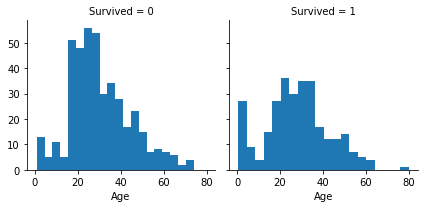

In [15]:
g = sns.FacetGrid(x_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Asking questions about your data.**<br>
> - ***Observations***<br>
    - Infants (Age <=4 approximately) had high survival rate.
    - Oldest passengers (Age = 80) survived.
    - Large number of 15-25 year olds did not survive.
    - Most passengers are in 15-35 age range.
> - ***Decisions***<br>
This simple analysis confirms our assumptions as decisions for subsequent workflow stages.
    - We should consider Age in our model training.
    - Complete the Age feature for null values.
    - We should band age groups.

***Correlating numerical and ordinal features***<br>
We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

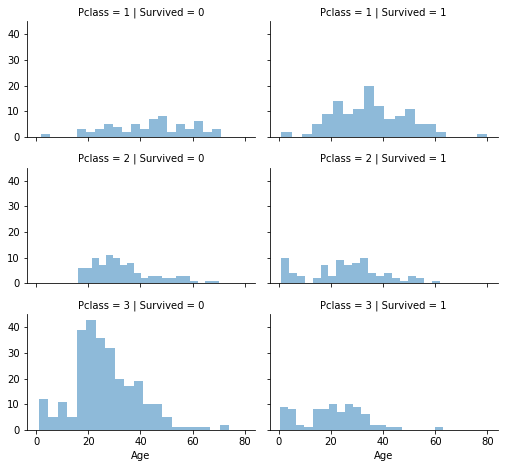

In [16]:
grid = sns.FacetGrid(x_train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

So here we it clearly observed that passenger from Pclass 1 will have better chance to survive than other class.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

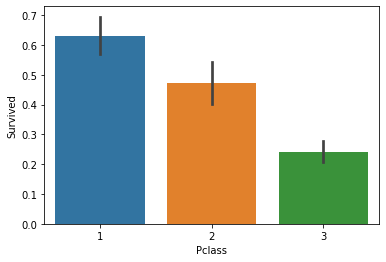

In [17]:
sns.barplot(x='Pclass', y='Survived', data=x_train)

Here we can a detailed view of the impact of Pclass on the survival of the pessanger and from this view we can observe the wide diffrent better Pclass 3 and Pclass 1

**Asking questions about your data.**<br>
> - ***Observations.***<br>
    - Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
    - Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
    - Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
    - Pclass varies in terms of Age distribution of passengers.
> - ***Decisions.***<br>
    - Consider Pclass for model training.

***Correlating categorical features***<br>

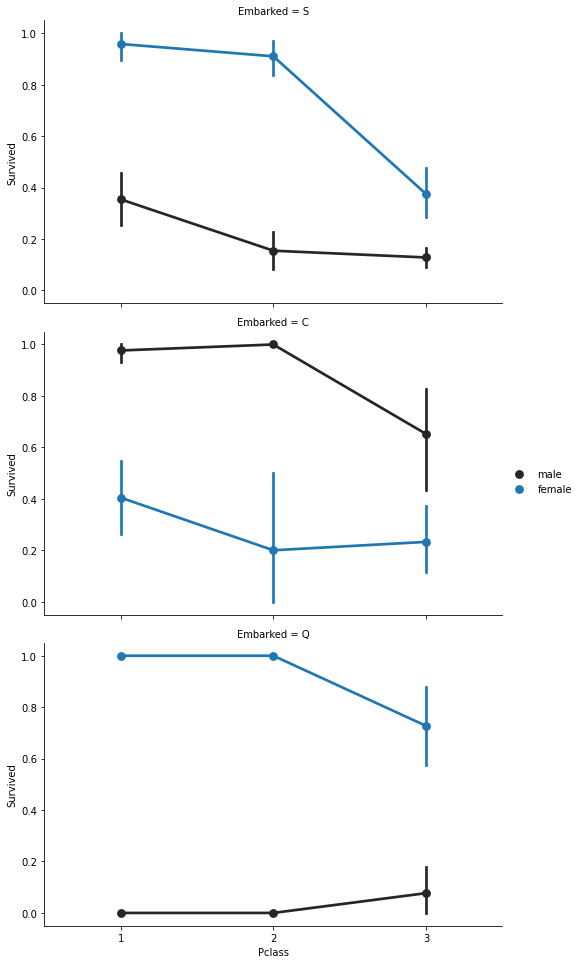

In [18]:
FacetGrid = sns.FacetGrid(x_train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Visually view what is the relation between gender/sex to thier chance of survival 

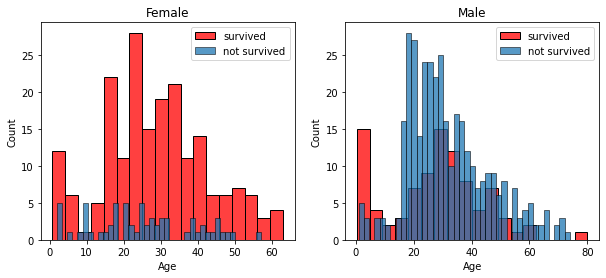

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = x_train[x_train['Sex']=='female']
men = x_train[x_train['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(),color="red", bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(),color="red", bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Here we can observe that the survival of female is higher than male. For male we can observe that male from age 0-10 (kid) is the only region that the number of survied is higher than not survived in the male section. This can be assume that because during evacuation they are prioritizing childern and women.

**Asking questions about your data.**<br>
> - ***Observations.***<br>
    - Female passengers had much better survival rate than males. Confirms classifying (#1).
    - Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
    - Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
    - Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).
> - ***Decisions.***<br>
    - Add Sex feature to model training.
    - Complete and add Embarked feature to model training.

Here we can observe the Embarked influenced the survial of the passenger depending on the gender and the Pclass of the person.The first observeable aspect is women from both port Q and S  have higher chance to survial compared to men but it opposite for the port C. The class also influnced the survival rate as we will see better later.

***Correlating discrete features***<br>
Since both SibSp and Parch can be in the same category which is relatives so we will combine the data to make our data easier to analyzed  

In [20]:
data = [x_train, x_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch'] 

<AxesSubplot:xlabel='relatives', ylabel='Survived'>

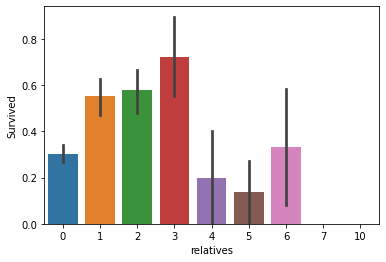

In [21]:
sns.barplot(x='relatives', y='Survived', data=x_train)

**Asking questions about your data.**<br>
> - ***Observations.***<br>
    - 1 to 3 person relatives have better chance of survival compared to other.
    - Assuming that passenger with higher number of relatives will take more time to evacuate and for people with no relatives will be hard to evacuate as they will have less help during evacuation 
> - ***Decisions.***<br>
    - Create new feature by combing `SibSp` and `Parch`

***Correlating categorical and numerical features***<br>
We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating `Embarked` (Categorical non-numeric), `Sex` (Categorical non-numeric), `Fare` (Numeric continuous), with `Survived` (Categorical numeric)

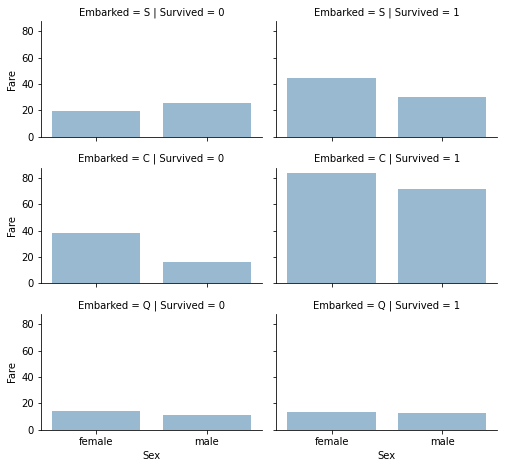

In [22]:
grid = sns.FacetGrid(x_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Asking questions about your data.**<br>
> - ***Observations.***<br>
    - Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
    - Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).
> - ***Decisions.***<br>
    - Consider banding Fare feature

###  <a name="preparedata">Wrangle Data

***Correcting by dropping features***<br>
In this section we will do necesarry process to prepare the data for the training.

Drop unnecesarry column

In [23]:
x_train = x_train.drop(['Ticket'], axis=1)
x_test = x_test.drop(['Ticket'], axis=1)

***Creating new feature extracting from existing***<br>
We want to analyze if Name feature can be engineered to extract titles and test correlation between titles and survival, before dropping Name and PassengerId features.

In [24]:
data = [x_train, x_test]
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(dataset['Title'], dataset['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


We can replace the less common titles with a more common name like `Rare`.

In [25]:
data = [x_train, x_test]
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
x_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

x_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,1


Now we can safely drop the Name feature from training and testing datasets. We also do not need the PassengerId feature in the training dataset.

In [27]:
x_train= x_train.drop(['Name', 'PassengerId'], axis=1)
x_test = x_test.drop(['Name', 'PassengerId'], axis=1)

***Converting a categorical feature***<br>
Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.
Start with converting Sex feature to a new feature called Gender where female=1 and male=0.

In [28]:
data = [x_train, x_test]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,1,1
1,1,1,1,38.0,1,0,71.2833,C85,C,1,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,0,2
3,1,1,1,35.0,1,0,53.1000,C123,S,1,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,0,1


***Completing a numerical continuous feature***<br>
Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.
We can consider three methods to complete a numerical continuous feature.<br>

1. A simple way is to generate random numbers between mean and standard deviation.<br>

2. More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...<br>

3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.<br>

Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.<br>

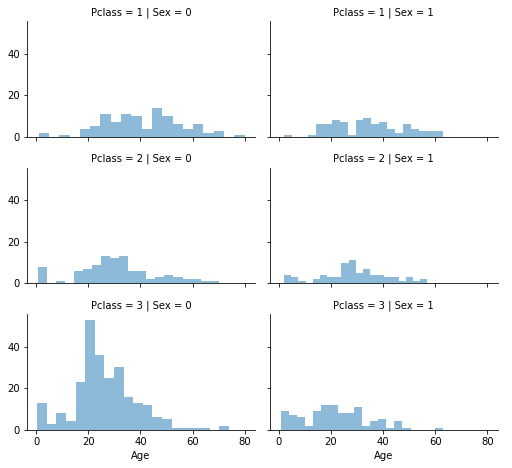

In [29]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(x_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [30]:
guess_ages = np.zeros((2,3))

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [31]:
data = [x_train, x_test]
for dataset in data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [32]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,Title
0,0,3,0,22,1,0,7.2500,NaN,S,1,1
1,1,1,1,38,1,0,71.2833,C85,C,1,3
2,1,3,1,26,0,0,7.9250,NaN,S,0,2
3,1,1,1,35,1,0,53.1000,C123,S,1,3
4,0,3,0,35,0,0,8.0500,NaN,S,0,1


In [33]:
## Sanity check the null value in dataframe
x_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin        687
Embarked       2
relatives      0
Title          0
dtype: int64

Below we fill in the null data in fare and age with 0 to be prepared for the next step

Here we create age bands and see its correlation with the survival 

In [34]:
x_train['AgeBand'] = pd.cut(x_train['Age'], 5)
x_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


From the age band we obsrve that it is possible to use this instead of just Age, so we create ordinal based on the band and drop the Age. This is done to reduce the complexity of the data and get better accuracy 

In [35]:
data=[x_train, x_test]
for dataset in data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
x_train=x_train.drop(['AgeBand'], axis=1)    

You may notice that your age is categorise base on the `AgeBand`

In [36]:
x_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,Title
0,0,3,0,1,1,0,7.2500,NaN,S,1,1
1,1,1,1,2,1,0,71.2833,C85,C,1,3
2,1,3,1,1,0,0,7.9250,NaN,S,0,2
3,1,1,1,2,1,0,53.1000,C123,S,1,3
4,0,3,0,2,0,0,8.0500,NaN,S,0,1


We use the same method from the age on fare , wher we create a `FareBand` and drop the `Fare`. As we can notice from the sanity check of `None` value, the `Fare` only have 1 missing value in the test data. Hence, we will fill the `None` value

In [37]:
x_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin        687
Embarked       2
relatives      0
Title          0
dtype: int64

In [38]:
x_test.isnull().sum()

Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin        327
Embarked       0
relatives      0
Title          0
dtype: int64

In [39]:
x_test['Fare'].fillna(x_test['Fare'].dropna().median(), inplace=True)
x_train['FareBand'] = pd.qcut(x_train['Fare'], 4)
x_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:
data=[x_train, x_test]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare']
x_train = x_train.drop(['FareBand'], axis=1)

In [41]:
x_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,Title
0,0,3,0,1,1,0,0.0,NaN,S,1,1
1,1,1,1,2,1,0,3.0,C85,C,1,3
2,1,3,1,1,0,0,1.0,NaN,S,0,2
3,1,1,1,2,1,0,3.0,C123,S,1,3
4,0,3,0,2,0,0,1.0,NaN,S,0,1
5,0,3,0,1,0,0,1.0,NaN,Q,0,1
6,0,1,0,3,0,0,3.0,E46,S,0,1
7,0,3,0,0,3,1,2.0,NaN,S,4,4
8,1,3,1,1,0,2,1.0,NaN,S,2,3
9,1,2,1,0,1,0,2.0,NaN,C,1,3


In [42]:
x_test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,Title
0,3,0,2,0,0,0.0,NaN,Q,0,1
1,3,1,2,1,0,0.0,NaN,S,1,3
2,2,0,3,0,0,1.0,NaN,Q,0,1
3,3,0,1,0,0,1.0,NaN,S,0,1
4,3,1,1,1,1,1.0,NaN,S,2,3
5,3,0,0,0,0,1.0,NaN,S,0,1
6,3,1,1,0,0,0.0,NaN,Q,0,2
7,2,0,1,1,1,2.0,NaN,S,2,1
8,3,1,1,0,0,0.0,NaN,C,0,3
9,3,0,1,2,0,2.0,NaN,S,2,1


***Create new feature combining existing features***<br>
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [43]:
data=[x_train, x_test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

x_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Create another feature called IsAlone.

In [44]:
data=[x_train, x_test]
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

x_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [45]:
x_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,relatives,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,0.0,NaN,S,1,1,2,0
1,1,1,1,2,1,0,3.0,C85,C,1,3,2,0
2,1,3,1,1,0,0,1.0,NaN,S,0,2,1,1
3,1,1,1,2,1,0,3.0,C123,S,1,3,2,0
4,0,3,0,2,0,0,1.0,NaN,S,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1.0,NaN,S,0,5,1,1
887,1,1,1,1,0,0,2.0,B42,S,0,2,1,1
888,0,3,1,1,1,2,2.0,NaN,S,3,2,4,0
889,1,1,0,1,0,0,2.0,C148,C,0,1,1,1


Then we will drop some redundent data such as cabin which is correlated with the fare and SibSp and Parch which we already merge as relatives

In [46]:
x_train = x_train.drop(['Cabin','SibSp','Parch'], axis=1)
x_test = x_test.drop(['Cabin','SibSp','Parch'], axis=1)

***Completing and Converting categorical feature to numeric***<br>
We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [47]:
x_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,Title,FamilySize,IsAlone
0,0,3,0,1,0.0,S,1,1,2,0
1,1,1,1,2,3.0,C,1,3,2,0
2,1,3,1,1,1.0,S,0,2,1,1
3,1,1,1,2,3.0,S,1,3,2,0
4,0,3,0,2,1.0,S,0,1,1,1


Next we will handle the missing data in Embarked by inserting the highest frequency value 

In [48]:
x_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Here we know that the highest frequency value is 'S'. So we will subtitue the null value with 'S'

In [49]:
data = [x_train, x_test]
common_value = 'S'
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    # Comment this line if you want to use one hot encoding
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
x_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,relatives,Title,FamilySize,IsAlone
0,0,3,0,1,0.0,0,1,1,2,0
1,1,1,1,2,3.0,1,1,3,2,0
2,1,3,1,1,1.0,0,0,2,1,1
3,1,1,1,2,3.0,0,1,3,2,0
4,0,3,0,2,1.0,0,0,1,1,1


#### Option 1: One hot encoding for the categorical data that we have which is `Sex` and `Embarked`
```python
x_train= pd.get_dummies(x_train, columns=['Embarked'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Embarked'], drop_first=True)
x_train.head()
```
![image](https://user-images.githubusercontent.com/59526258/134169180-dd97be7c-56c5-4ef4-8ddb-bb9f80926149.png)


#### Option 2: You may remove the `relative`, `Family Size` and `isAlone` to decrease the curse of dimension.

Before we continue, we are perform sanity and make sure no null value in our dataframe.

In [50]:
x_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
relatives     0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

In [51]:
x_test.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
relatives     0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

In [52]:
y_train=x_train['Survived']
y_test= pd.read_csv('../data/titanic_test_result.csv')
y_test=y_test['Survived']

In [53]:
x_train=x_train.drop(['Survived'], axis=1)

#### Option 3: Use PCA
```python
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test= pca.transform(x_test)
```

## Model, predict and solve
Split the data for the output and input

### <a name="model"> Model Training 

In this section we will start our training and our measure is the accuracy of our model which we will use the test data to get the model accuracy. These models's accuracy are compared and the results are open for discussion.

The model that we are using is:
1. Logistic regression
2. Support vector machines
3. K Nearest Neighbours 
4. Random Forest
5. Decision Tree

#### Logistic regression

In [55]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(x_train, y_train)
logistic_prediction = logreg.predict(x_test)
logistic_accuracy=accuracy_score(y_test, logistic_prediction)
print(logistic_accuracy)
print(confusion_matrix(y_test, logistic_prediction))
print(classification_report(y_test, logistic_prediction))

0.631578947368421
[[259   7]
 [147   5]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       266
           1       0.42      0.03      0.06       152

    accuracy                           0.63       418
   macro avg       0.53      0.50      0.42       418
weighted avg       0.56      0.63      0.51       418



#### Support vector machines

In [56]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svm_prediction = svm.predict(x_test)
svm_accuracy=accuracy_score(y_test, svm_prediction)
print(svm_accuracy)
print(confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test,svm_prediction))

0.6363636363636364
[[266   0]
 [152   0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       266
           1       0.00      0.00      0.00       152

    accuracy                           0.64       418
   macro avg       0.32      0.50      0.39       418
weighted avg       0.40      0.64      0.49       418



#### K Nearest Neighbours

In [57]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
knn_accuracy=accuracy_score(y_test, knn_prediction)
print(knn_accuracy)
print(confusion_matrix(y_test, knn_prediction))
print(classification_report(y_test,knn_prediction))

0.7655502392344498
[[241  25]
 [ 73  79]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       266
           1       0.76      0.52      0.62       152

    accuracy                           0.77       418
   macro avg       0.76      0.71      0.72       418
weighted avg       0.76      0.77      0.75       418



#### Random Forest

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
rf_prediction = random_forest.predict(x_test)
rf_accuracy=accuracy_score(y_test, rf_prediction)
print(rf_accuracy)
print(confusion_matrix(y_test, rf_prediction))
print(classification_report(y_test,rf_prediction))

0.8157894736842105
[[225  41]
 [ 36 116]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       266
           1       0.74      0.76      0.75       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418



#### Decision Tree

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
dt_prediction = decision_tree.predict(x_test)
dt_accuracy=accuracy_score(y_test, dt_prediction)
print(dt_accuracy)
print(confusion_matrix(y_test, dt_prediction))
print(classification_report(y_test,dt_prediction))

0.8157894736842105
[[228  38]
 [ 39 113]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       266
           1       0.75      0.74      0.75       152

    accuracy                           0.82       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.82      0.82      0.82       418



Overall model comparison

In [60]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [svm_accuracy, knn_accuracy, logistic_accuracy, 
              rf_accuracy, dt_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.815789
4,Decision Tree,0.815789
1,KNN,0.765550
0,Support Vector Machines,0.636364
2,Logistic Regression,0.631579


Here we observe that the SVM model is the perfect model for our prediction 

# Reference

1. [Machine Learning with the Titanic Dataset](https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280)
2. [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook)
3. [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)